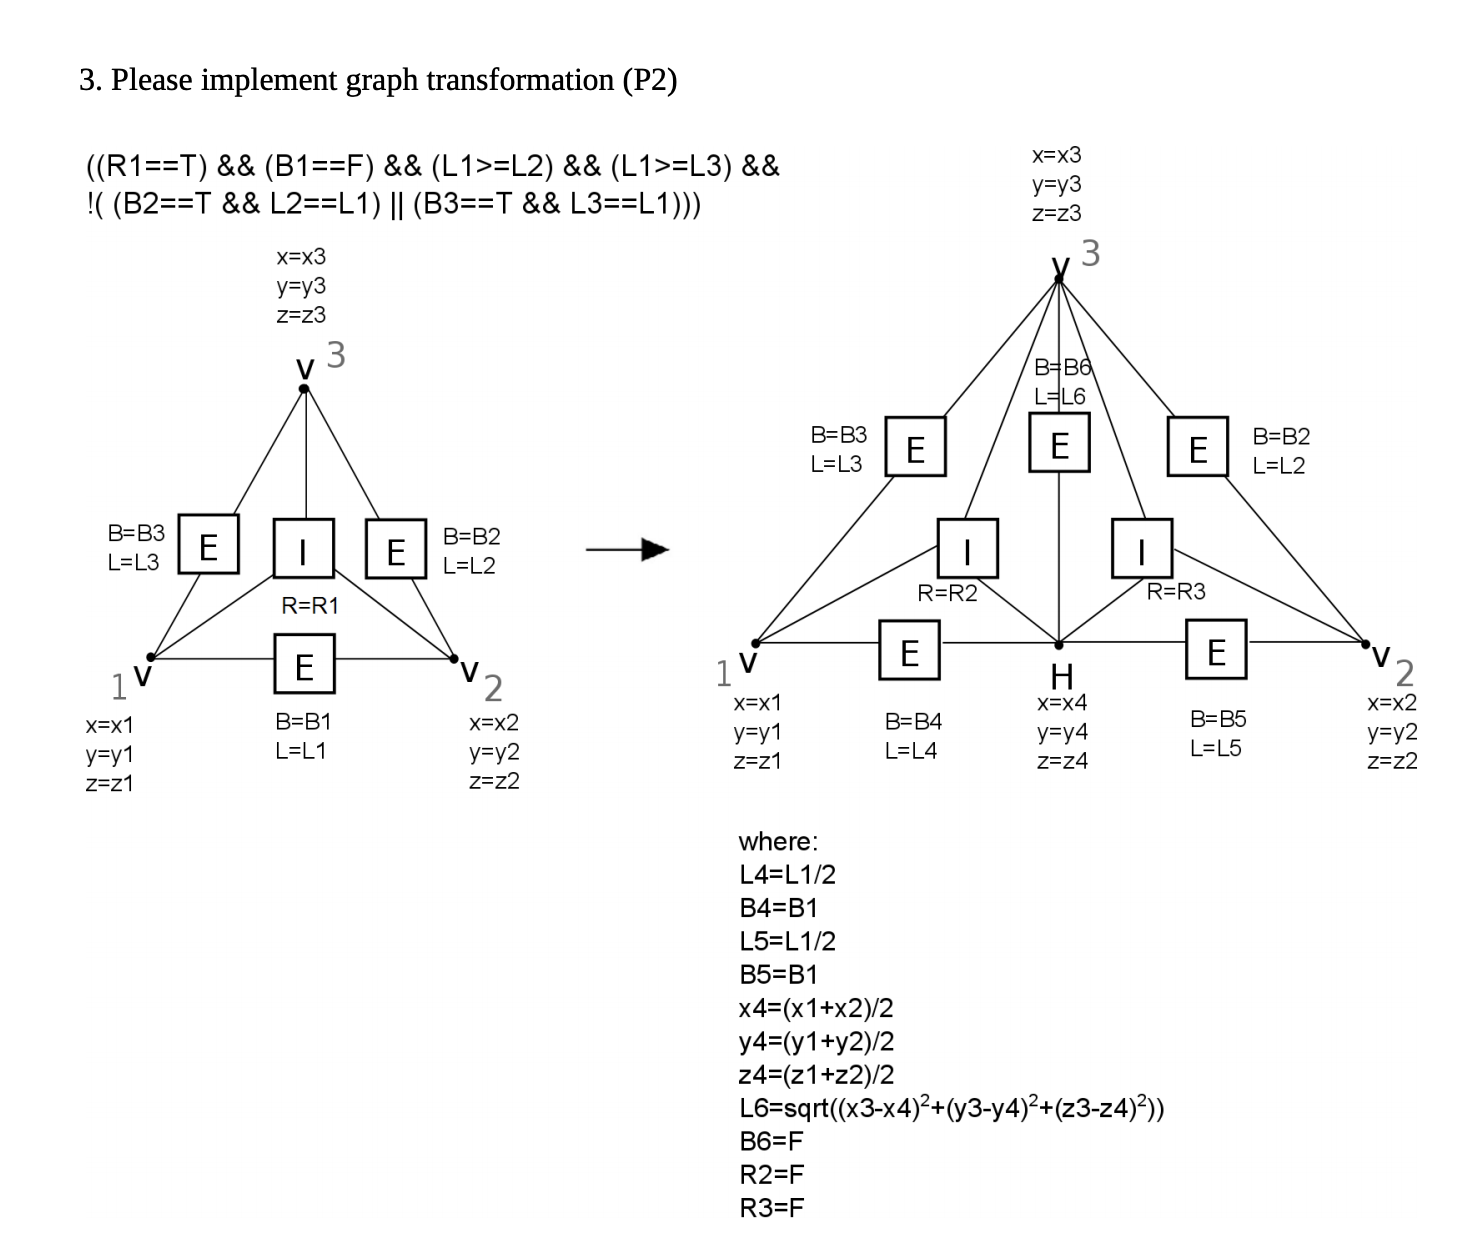

In [ ]:
pip install networkx==2.3

In [ ]:
pip install matplotlib

In [106]:
import math

In [107]:
def merge_two_dicts(dict, dict2, dict2_name):
    for key, value in dict2.items():
        if dict.get(key) is None:
            dict[key] = {}
        dict[key][dict2_name] = value
    return dict

def merge_dicts(dicts):
    init_dict = {}
    for key, value in dicts.items():
        init_dict = merge_two_dicts(init_dict, value, key)
    return init_dict

In [108]:
def transform_ex_3(G):
    l4 = G.nodes['e1']['l'] / 2
    b4 = G.nodes['e1']['b']
    l5 = G.nodes['e1']['l'] / 2
    b5 = G.nodes['e1']['b']
    x4 = (G.nodes['v1']['x'] + G.nodes['v2']['x']) / 2
    y4 = (G.nodes['v1']['y'] + G.nodes['v2']['y']) / 2
    z4 = (G.nodes['v1']['z'] + G.nodes['v2']['z']) / 2
    x3 = G.nodes['v3']['x']
    y3 = G.nodes['v3']['y']
    z3 = G.nodes['v3']['z']
    l6 = math.sqrt(math.pow(x3 - x4, 2) + math.pow(y3 - y4, 2) + math.pow(z3 - z4, 2))
    b6 = False
    r2 = False
    r3 = False
    
    G.remove_edge('v1', 'e1')
    G.remove_edge('v2', 'e1')
    G.remove_node('e1')
    G.remove_edge('i1', 'v1')
    G.remove_edge('i1', 'v2')
    G.remove_edge('i1', 'v3')
    G.remove_node('i1')

    G.add_node('i2', type='i', r=r2)
    G.add_node('i3', type='i', r=r3)
    
    G.add_node('e4', type='e', b=b4, l=l4)
    G.add_node('e5', type='e', b=b5, l=l5)
    G.add_node('e6', type='e', b=b6, l=l6)

    G.add_node('v4', type='v', x=x4, y=y4, z=z4)
    
    G.add_edge('v3', 'e6')
    G.add_edge('v4', 'e6')
    
    G.add_edge('v1', 'e4')
    G.add_edge('v1', 'i2')
    G.add_edge('v3', 'i2')
    G.add_edge('v4', 'i2')
    G.add_edge('v4', 'e4')
    
    G.add_edge('v2', 'e5')
    G.add_edge('v2', 'i3')
    G.add_edge('v3', 'i3')
    G.add_edge('v4', 'i3')
    G.add_edge('v4', 'e5')
    
    
    return G;


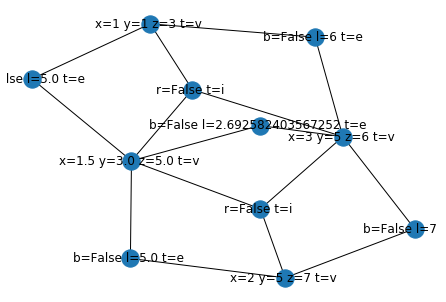

In [110]:
import sys

import matplotlib.pyplot as plt
import networkx as nx

x1 = 1
x2 = 2
x3 = 3
y1 = 1
y2 = 5
y3 = 5
z1 = 3
z2 = 7
z3 = 6
r1 = True
b1 = False
b2 = False
b3 = False
l1 = 10
l2 = 7 
l3 = 6


G=nx.Graph()
G.add_node('v1', type='v', x=x1, y=y1, z=z1)
G.add_node('v2', type='v', x=x2, y=y2, z=z2)
G.add_node('v3', type='v', x=x3, y=y3, z=z3)
G.add_node('e1', type='e', b=b1, l=l1)
G.add_node('e2', type='e', b=b2, l=l2)
G.add_node('e3', type='e', b=b3, l=l3)
G.add_node('i1', type='i', r=r1)

G.add_edge('e1', 'v1')
G.add_edge('e1', 'v2')
G.add_edge('e2', 'v2')
G.add_edge('e2', 'v3')
G.add_edge('e3', 'v1')
G.add_edge('e3', 'v3')
G.add_edge('i1', 'v1')
G.add_edge('i1', 'v2')
G.add_edge('i1', 'v3')


transform_ex_3(G)


types = nx.get_node_attributes(G, 'type')
xs = nx.get_node_attributes(G, 'x')
ys = nx.get_node_attributes(G, 'y')
zs = nx.get_node_attributes(G, 'z')
bs = nx.get_node_attributes(G, 'b')
ls = nx.get_node_attributes(G, 'l')
rs = nx.get_node_attributes(G, 'r')


labels = merge_dicts({
    "x": xs,
    "y": ys,
    "z": zs,
    "b": bs,
    "l": ls,
    "r": rs,
    "t": types
})

labels_traversed = {}

for key, value in labels.items():
    label = ""
    for ikey, value in value.items():
        label += ikey + "=" + str(value) + " "
    labels_traversed[key] = label

nx.draw(G, labels=labels_traversed)


